In [1]:
import matplotlib.pyplot as plt
import numpy as np
import soundfile
from IPython.display import Audio

In [2]:
# PAN
# This function pans a mono audio signal in a stereo field. It is implemented
# such that it can pan th entire signal to one location if 'panValue' is a scalar.
# It can also be used for auto-pan effects if 'panValue' is an array.
#
# Input Variables
# panType: 1 = linear, 2 = sqRt, 3 = sine law
# panValue: (-100 to 100) transformed to a scale of (0-1)

def pan(x, panValue, panType):
    # Convert pan value to a normalized scale
    panTransform = (panValue/200) + 0.5

    # Conditional statements determining panType
    if panType == 1:
        leftAmp = 1 - panTransform
        rightAmp = panTransform

    elif panType == 2:
        leftAmp = np.sqrt(1 - panTransform)
        rightAmp = np.sqrt(panTransform)

    elif panType == 3:
        leftAmp = np.sin((1 - panTransform) * (np.pi/2))
        rightAmp = np.sin(panTransform * (np.pi/2))

    leftChannel = leftAmp * x
    rightChannel = rightAmp * x

    return [leftChannel, rightChannel]

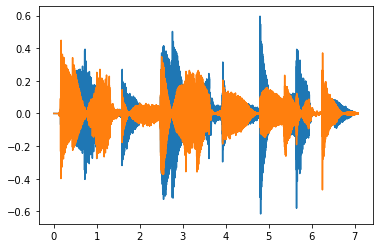

In [4]:
# AUTOPANEXAMPLE
# This script implements the automatic panning (auto-pan) effect. The function
# 'pan' is used to process an input signal, along with an array of pan values
# for each sample number in the signal.
#
# See also PAN

# Import test sound file
[x, Fs] = soundfile.read('AcGtr.wav')
N = len(x)
Ts = 1/Fs
t = np.arange(0, N) * Ts
f = 1

panValue = 100 * np.sin(2 * np.pi * f * t)
panType = 2

out = pan(x, panValue, panType)
plt.plot(t, out[:][0], t, out[:][1])
plt.show()

Audio(out, rate=Fs)

In [20]:
# MIDSIDEPROCESSING
# This script performs mid/side (sum and difference) encoding
# and decoding.

[x, Fs] = soundfile.read('distDrums.wav')

# Separate stereo signal into two mono signals
left = x[:, 0]
right = x[:, 1]

# Mid/side encoding
mid = 0.5 * (left + right)
sides = 0.5 * (left - right)

# Add additional processing here
# (e.g.. distortion, compression, etc.)
#########################################################


#########################################################

# Mid/side decoding
newL = mid + sides
newR = mid - sides

output = [newL, newR]

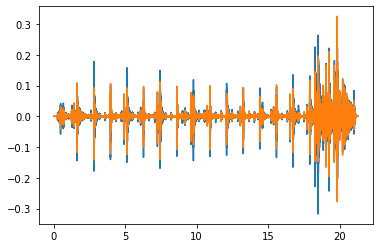

In [5]:
# STEREOIMAGER
# This script demonstrates the stereo image widening effect. The effect
# is based on mid/side processing. The parameter 'width' can be used to
# make the example drum file sound wider or narrower.
#
# See also MIDSIDEPROCESSING

[x, Fs] = soundfile.read('distDrums.wav')
N = len(x)
Ts = 1/Fs
t = np.arange(0, N) * Ts

# Splitting signal into right and left channels
L = x[:,0]
R = x[:,1]

# Create mid and side channels
side = 0.5 * (L - R)
mid = 0.5 * (L + R)

# Width amount (wider if > 1, narrower if < 1)
width = 1.5

# Scale the mid/side with width
sideNew = width * side
midNew = (2 - width) * mid

# Create new M/S signal
newLeft = midNew + sideNew
newRight = midNew - sideNew

# Combine signals, concatenated side-by-side, 2 columns
out = [newLeft, newRight]

plt.plot(t, out[:][0], t, out[:][1])
plt.show()

Audio(out, rate=Fs)

In [78]:
# GONIOMETER
#
# This function analyzes a stereo audio signal and creates a goniometer plot.
# This visualization indicates the stereo width of a signal.
#
# Values along the vertical axis represent parts of the signal in the middle
# (or center) of the stereo field. This occurs when the left and right channels
# are identical. Conversely, values along the horizontal axis represent parts
# of the signal when the left and right channels have opposite polarities.
#
# Values at an angle of 45 degrees represent when there is a signal panned to
# the right channel and to the left channel has zeros amplitude. Similarly,
# values at an angle of 135 degrees represent when there is a signal panned
# to the left channel and the right channel has zero amplitude.
#
# See also GONIOMETEREXAMPLE

def goniometer(input):
    input = np.transpose(input)
    N = len(input)
    x = np.zeros([N, 1])
    y = np.zeros([N, 1])

    for n in range(N):
        L = input[n][0]
        R = input[n][1]

        radius = np.sqrt(pow(L, 2) + pow(R, 2))
        angle = np.arctan2(L, R)
        angle = angle + (np.pi/4) #  Rotate by convention

        x[n] = radius * np.cos(angle)
        y[n] = radius * np.sin(angle)

    plt.axline((-1, 0), (1, 0), color='dimgrey')
    plt.axline((0, -1), (0, 1), color='dimgrey')
    plt.axline((-1, 1), (1, -1), color='dimgrey')
    plt.axline((-1, -1), (1, 1), color='dimgrey')

    # Circle
    th = np.arange(0, 2 * np.pi, np.pi/50)
    xunit = np.cos(th)
    yunit = np.sin(th)
    plt.plot(xunit, yunit, color='dimgrey')

    # Left
    xL = -0.75
    yL = 0.8
    txtL = 'L'
    plt.text(xL, yL, txtL, color='dimgrey')

    # Right
    xR = 0.73
    yR = 0.8
    txtR = 'R'
    plt.text(xR, yR, txtR, color='dimgrey')

    # Mid
    xM = -0.018
    yM = 0.96
    txtM = 'M'
    plt.text(xM, yM, txtM, color='dimgrey')

    # Side
    xS = -0.98
    yS = 0
    txtS = 'S'
    plt.text(xS, yS, txtS, color='dimgrey')

    # Plot data
    plt.plot(x, y, '.r')
    plt.axis([-1, 1, -1, 1])
    plt.show()

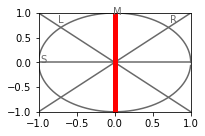

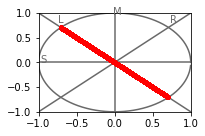

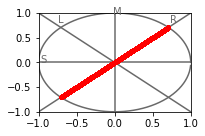

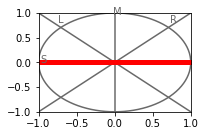

In [79]:
# GONIOMETEREXAMPLE
#
# This script demonstrates several example plots of the goniometer.
#
# Examples include a signal panned to the center, left, and right. Finally,
# an example is shown when the left and right channels have opposite polarity.
#
# See also GONIOMETER

# Test signal
Fs = 48000
Ts = 1/Fs
f = 10
t = np.arange(0, 1*Fs) * Ts
x = np.sin(2 * np.pi * f * t)

# Center
panCenter = [0.707 * x, 0.707 * x]
# must convert tuple to list
panCenter = list(panCenter)
plt.subplot(2,2,1)
goniometer(panCenter)

# Left
panLeft = [x, np.zeros(np.size(x))]
panLeft = list(panLeft)
plt.subplot(2,2,2)
goniometer(panLeft)

# Right
panRight = [np.zeros(np.size(x)), x]
panRight = list(panRight)
plt.subplot(2,2,3)
goniometer(panRight)

# Opposite polarities
polarity = [0.707 * x, 0.707 * (-x)]
polarity = list(polarity)
plt.subplot(2,2,4)
goniometer(polarity)
